In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from feature_engine.discretisation import EqualWidthDiscretiser
#from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


In [17]:
data= pd.read_csv("flight_dataset.csv")

In [18]:
data

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


Exploring the data frame


In [19]:
data.info() #we have no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [30]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [31]:
data.describe(include='all') #data is skewed


,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683,10683,10683,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
unique,12,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jet Airways,Delhi,Cochin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3849,4537,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,NaN,NaN,NaN,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,NaN,NaN,NaN,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,NaN,NaN,NaN,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,NaN,NaN,NaN,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000


In [32]:
data.isnull().sum() #no null value

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

EDA

In [33]:
flight_eda = data.copy()

IndexError: index 12 is out of bounds for axis 0 with size 12

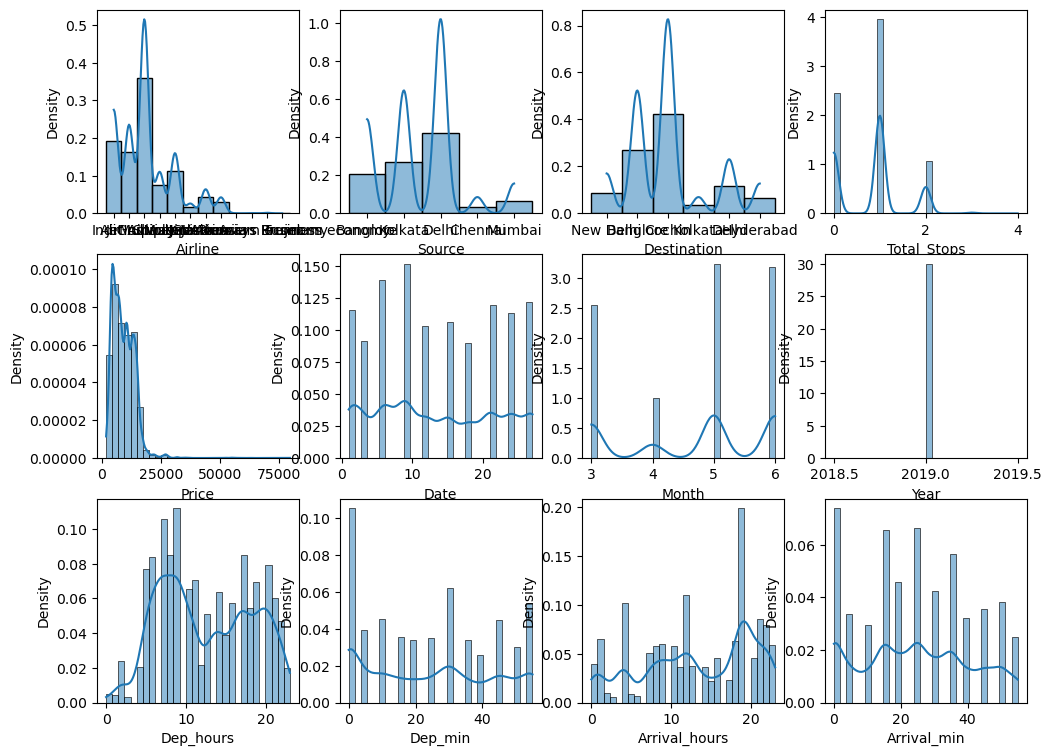

In [34]:
number_column = [n for n in flight_eda.columns if flight_eda[n].dtypes!='0']

fig, ax = plt.subplots(3,4, figsize=(12,9))
ax = ax.flatten()

for i, col in enumerate(number_column):
    sns.histplot(flight_eda[col],kde=True,stat='density',bins=30,ax=ax[i])
    
for i in range(len(number_column),12):
    ax[i].axis('off')
    plt.tight_layout()
    plt.show()
    

In [35]:
data.info() #int and #object need to convert

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [36]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


Encode Categorical Value

In [37]:
data_cat = pd.get_dummies(data,columns=['Airline','Source','Destination'],drop_first=True)

In [38]:
data_cat

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,2019,5,50,13,15,7,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,2019,9,25,4,25,19,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,2019,18,5,23,30,5,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,2019,16,50,21,35,4,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,22,25,2,...,False,False,False,True,False,False,False,False,False,False
10679,0,4145,27,4,2019,20,45,23,20,2,...,False,False,False,True,False,False,False,False,False,False
10680,0,7229,27,4,2019,8,20,11,20,3,...,False,False,False,False,False,False,True,False,False,False
10681,0,12648,1,3,2019,11,30,14,10,2,...,False,False,False,False,False,False,False,False,False,True


Drop unneccesary columns


In [39]:
data_cat.drop(['Dep_hours','Dep_min','Arrival_hours','Arrival_min'],axis=1,inplace=True)

In [26]:
data

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


In [40]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10683 non-null  int64
 1   Price                                      10683 non-null  int64
 2   Date                                       10683 non-null  int64
 3   Month                                      10683 non-null  int64
 4   Year                                       10683 non-null  int64
 5   Duration_hours                             10683 non-null  int64
 6   Duration_min                               10683 non-null  int64
 7   Airline_Air India                          10683 non-null  bool 
 8   Airline_GoAir                              10683 non-null  bool 
 9   Airline_IndiGo                             10683 non-null  bool 
 10  Airline_Jet Airways                        106

#convert boolean columns to int

In [41]:
data_cat = data_cat.astype(int)

In [42]:
data_cat.info() #everything has converted in to integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10683 non-null  int32
 1   Price                                      10683 non-null  int32
 2   Date                                       10683 non-null  int32
 3   Month                                      10683 non-null  int32
 4   Year                                       10683 non-null  int32
 5   Duration_hours                             10683 non-null  int32
 6   Duration_min                               10683 non-null  int32
 7   Airline_Air India                          10683 non-null  int32
 8   Airline_GoAir                              10683 non-null  int32
 9   Airline_IndiGo                             10683 non-null  int32
 10  Airline_Jet Airways                        106

In [43]:
print(data_cat.describe())

        Total_Stops         Price          Date         Month     Year  \
count  10683.000000  10683.000000  10683.000000  10683.000000  10683.0   
mean       0.824207   9087.064121     13.508378      4.708602   2019.0   
std        0.675199   4611.359167      8.479277      1.164357      0.0   
min        0.000000   1759.000000      1.000000      3.000000   2019.0   
25%        0.000000   5277.000000      6.000000      3.000000   2019.0   
50%        1.000000   8372.000000     12.000000      5.000000   2019.0   
75%        1.000000  12373.000000     21.000000      6.000000   2019.0   
max        4.000000  79512.000000     27.000000      6.000000   2019.0   

       Duration_hours  Duration_min  Airline_Air India  Airline_GoAir  \
count    10683.000000  10683.000000       10683.000000   10683.000000   
mean        10.246560     28.327249           0.163999       0.018160   
std          8.494988     16.946113           0.370292       0.133535   
min          1.000000      0.000000      

Now the data visulization


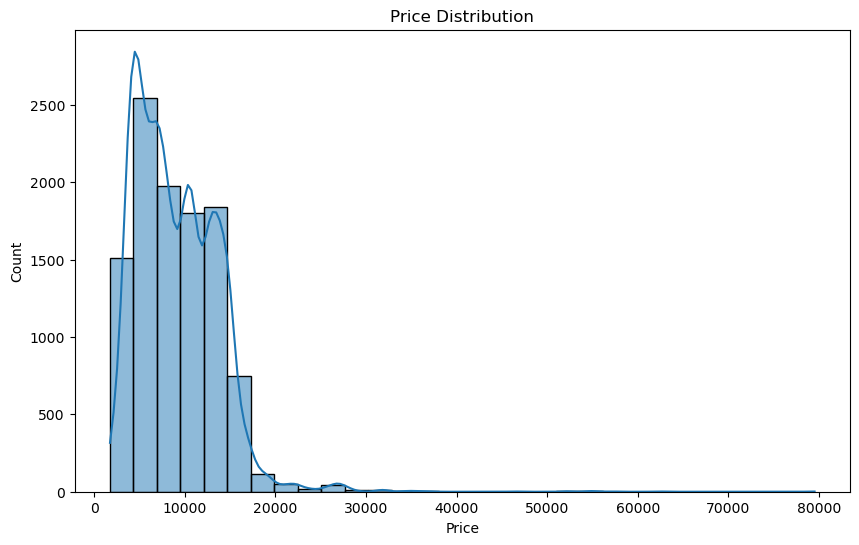

In [44]:
plt.figure(figsize=(10,6)) #right skewed data
sns.histplot(data_cat['Price'],bins=30,kde=True)
plt.title('Price Distribution')
plt.show()

#price with total stops

In [45]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10683 non-null  int32
 1   Price                                      10683 non-null  int32
 2   Date                                       10683 non-null  int32
 3   Month                                      10683 non-null  int32
 4   Year                                       10683 non-null  int32
 5   Duration_hours                             10683 non-null  int32
 6   Duration_min                               10683 non-null  int32
 7   Airline_Air India                          10683 non-null  int32
 8   Airline_GoAir                              10683 non-null  int32
 9   Airline_IndiGo                             10683 non-null  int32
 10  Airline_Jet Airways                        106

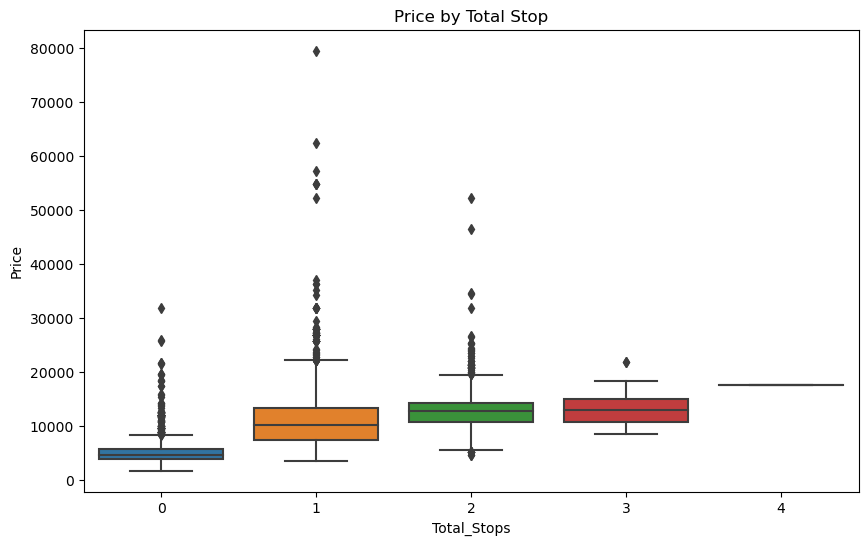

In [46]:
plt.figure(figsize=(10,6)) #right skewed data
sns.boxplot(x='Total_Stops',y='Price',data=data_cat)
plt.title('Price by Total Stop') #we found some outliers
plt.show()

#lets plot correlationship

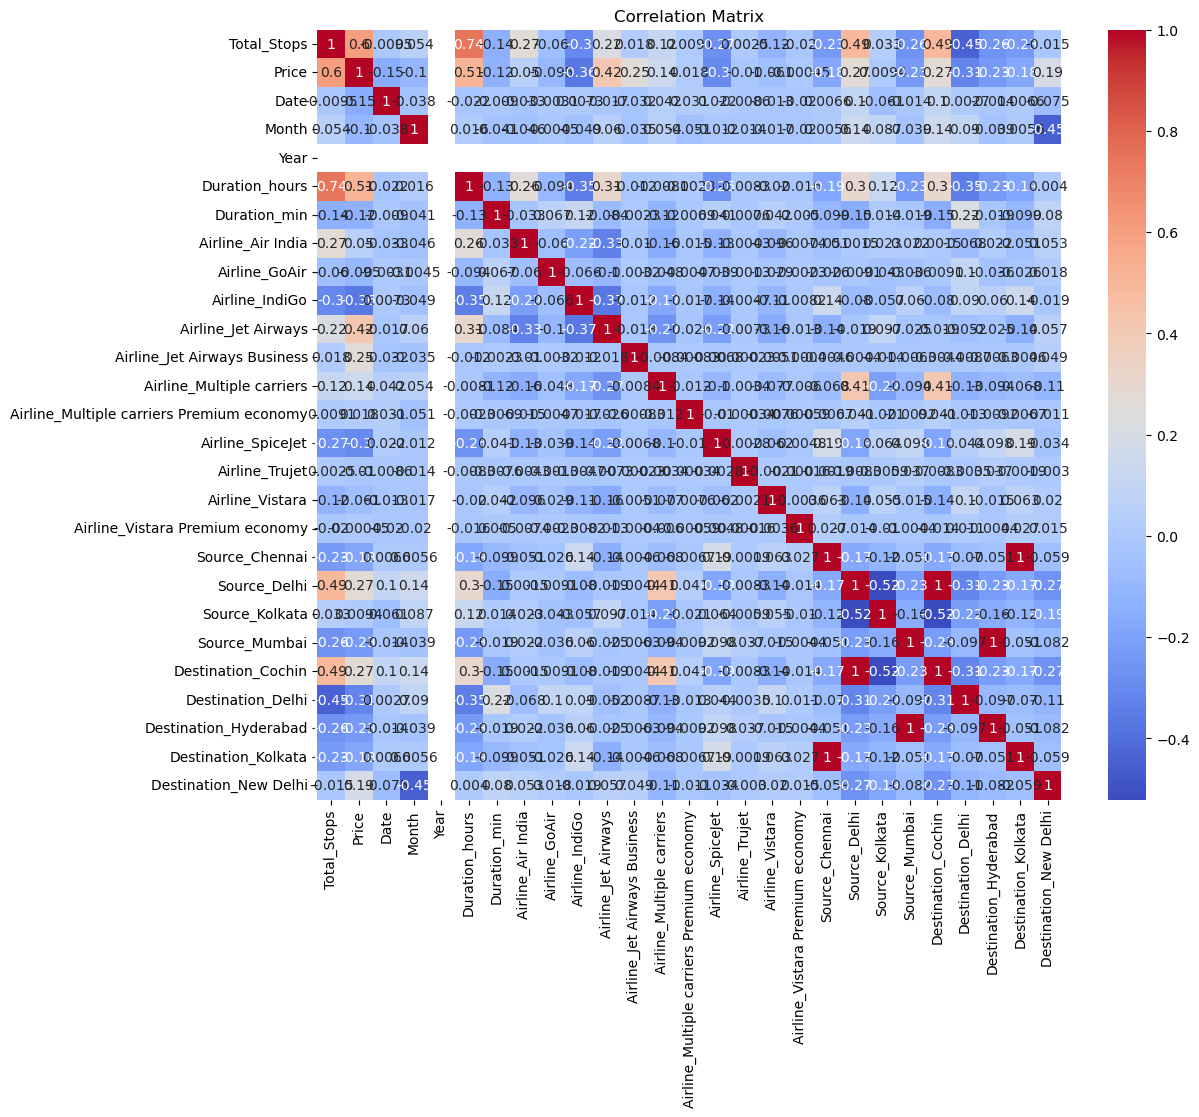

In [47]:
plt.figure(figsize=(12,10))
sns.heatmap(data_cat.corr(),annot=True,cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [48]:
data_cat.drop(['Date','Month','Year'],axis=1,inplace=True)

In [49]:
X=data_cat.drop('Price',axis=1)
y=data_cat['Price']

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

apply linear Regression

In [55]:
lr_model= LinearRegression()
lr_model.fit(X_train,y_train)
lr_predict=lr_model.predict(X_test)

In [72]:
lr_predict=lr_model.predict(X_test)

In [56]:
#random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
rf_predict= rf_model.predict(X_test)

Model Evaluation

In [57]:
print("Linear Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test,lr_predict))
print("Mean Absolute Error", mean_absolute_error(y_test,lr_predict))
print("R^2 Score:", r2_score(y_test, lr_predict))


Linear Regression Performance:
Mean Squared Error: 8772272.398966487
Mean Absolute Error 2036.0085350017364
R^2 Score: 0.585509049868649


In [ ]:
mse = avg sqr of diff between actual an predict = 8,7722.39 #prediction is far from actual price
mae= avg absolute diff between predicted and actual =2036
R^2 variance in the dependant variable that predictable from independent variable 0.58 means which mean 58%

In [58]:
#print("Mean Squared Error:", mean_squared_error(y_test,lr_predict))

Mean Squared Error: 8772272.398966487


In [75]:
#print("Mean Absolute Error", mean_absolute_error(y_test,lr_predict))

In [76]:
#print("Mean Absolute Error:", mean_absolute_error(y_test,lr_y_pred))

In [63]:
print("R^2 Score:", r2_score(y_test, lr_predict))

R^2 Score: 0.585509049868649


In [58]:
#Evalute Random Forest Model
print("Random Forest Performance:")
print("Mean Squared Error:", mean_squared_error(y_test,rf_predict))
print("Mean Absolute Error:", mean_absolute_error(y_test,rf_predict))
print("R^2 Score:", r2_score(y_test,rf_predict))

Random Forest Performance:
Mean Squared Error: 9524867.897577638
Mean Absolute Error: 1786.8386727828174
R^2 Score: 0.5499488199650878


#random forest will reduce the risk of overfiiting #avg processing of multiple trees can mitigate
the impact of noise
it can handle large dataset with high desnity
helpfull for feature selection nonliniar relationship

mse = 9524 , it indicates betterfit
Mae=1,786 = shows avg error in same unit
R2=it ranges from 0 to 1 , 54.99% , suggest moderate fit

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

Grid Search Cv is a skicit learn  function hyperparameter tuning by training and evalutinhg a ml model
using different combination of hyperparameter
The process of training and evaluting the model for each combination is called cross validation
the hyperparameter to be tuned= specify range for each hyperparameter
ml model=type of model we want to use
performance metric to be used 

XG boost regression = numerical

In [62]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


param_grid = tune the hyperparameter
n_estimator= number of trees in forest
max_features= max depth of tree
min sample split = minimum number of sample
bootstrap' is a boolean indicating whether bootstrap samples are used when building tree


In [68]:
# Extract the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize the model with the best parameters
final_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

# Train the final model on the entire training set
final_model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_split=5, random_state=42)

Evalute the final model

In [69]:
y_pred= final_model.predict(X_test)

In [70]:
# Predict the prices on the test set
y_pred = final_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Final Model RMSE: {rmse}")
print(f"Final Model R^2: {r2}")


Final Model RMSE: 2814.1471500605394
Final Model R^2: 0.6258062330397467


In [ ]:
Root mean square error = avg magnitude of error predicting flight price
2814 avg price , 63% of prediction of flight price
R2 closer to 1, model fits the data well, still we can improve the prediction

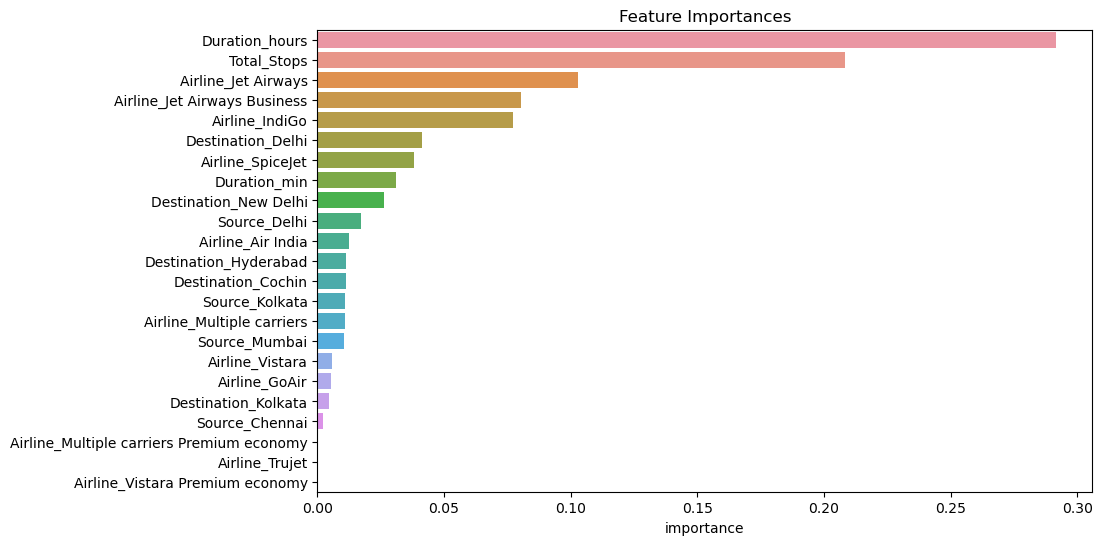

In [71]:
# Feature importance analysis
feature_importances = pd.DataFrame(final_model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title("Feature Importances")
plt.show()


In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GradientBoostingRegressor
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

# Perform GridSearchCV
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters for Gradient Boosting:", gb_grid_search.best_params_)

# Evaluate the best model
best_gb_model = gb_grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
gb_r2 = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting RMSE: {gb_rmse}")
print(f"Gradient Boosting R^2: {gb_r2}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Gradient Boosting RMSE: 2791.2976572617627
Gradient Boosting R^2: 0.6318581030163799


In [75]:
# Initialize the RandomForestRegressor with the best parameters
best_params = grid_search.best_params_
final_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)
final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

In [76]:
#evalute the final
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Final Model RMSE: {rmse}")
print(f"Final Model R^2: {r2}")

Final Model RMSE: 2814.1471500605394
Final Model R^2: 0.6258062330397467


In [77]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for GradientBoostingRegressor
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

# Perform GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)

# Train the final Gradient Boosting model with the best parameters
best_gb_model = grid_search_gb.best_estimator_
best_gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the final Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting RMSE: {rmse_gb}")
print(f"Gradient Boosting R^2: {r2_gb}")


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.9}
Gradient Boosting RMSE: 2788.3004950450413
Gradient Boosting R^2: 0.6326482649700791
